In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data = {
    'EducationLevel': [
        'High School','Bachelor','Master','PhD','Bachelor','Master','High School','PhD',
        'Bachelor','Master','PhD','High School','Bachelor','Master','PhD','High School',
        'Bachelor','Master','PhD','High School','Bachelor','Master','PhD','High School',
        'Bachelor','Master','PhD','High School','Bachelor','Master'
    ],
    'Department': [
        'Sales','IT','HR','Research','Sales','IT','HR','IT',
        'Research','Sales','HR','IT','Sales','Research','IT','HR',
        'Sales','IT','Research','HR','Sales','IT','HR','Research',
        'Sales','IT','HR','Research','Sales','IT'
    ],
    'YearsExperience': [
        1,3,5,7,2,6,1,8,
        4,5,9,2,3,7,10,1,
        6,8,12,2,4,9,11,1,
        5,7,13,2,3,8
    ],
    'PreferredShift': [
        'Morning','Evening','Morning','Night','Morning','Evening','Morning','Night',
        'Morning','Evening','Night','Morning','Evening','Night','Morning','Evening',
        'Morning','Night','Evening','Morning','Night','Morning','Evening','Night',
        'Morning','Evening','Night','Morning','Evening','Night'
    ],
    'JobRole': [
        'Sales Associate','Software Engineer','HR Specialist','Data Scientist',
        'Sales Associate','Software Engineer','HR Assistant','Data Scientist',
        'Research Analyst','Sales Associate','HR Specialist','IT Support',
        'Sales Associate','Research Analyst','Software Engineer','HR Assistant',
        'Sales Associate','Software Engineer','Data Scientist','HR Assistant',
        'Sales Associate','Software Engineer','HR Specialist','Data Scientist',
        'Sales Associate','Software Engineer','HR Specialist','HR Assistant',
        'Sales Associate','Software Engineer'
    ]
}

df = pd.DataFrame(data)

In [10]:
df.head()

,EducationLevel,Department,YearsExperience,PreferredShift,JobRole
0,High School,Sales,1,Morning,Sales Associate
1,Bachelor,IT,3,Evening,Software Engineer
2,Master,HR,5,Morning,HR Specialist
3,PhD,Research,7,Night,Data Scientist
4,Bachelor,Sales,2,Morning,Sales Associate


In [11]:
## Here, we have features EducationLevel, Department, YearsExperience and PreferredShift
## TargetClass is JobRole

In [12]:
df.isna().sum()

EducationLevel     0
Department         0
YearsExperience    0
PreferredShift     0
JobRole            0
dtype: int64

In [13]:
df.shape

(30, 5)

In [14]:
df['EducationLevel'].unique()

array(['High School', 'Bachelor', 'Master', 'PhD'], dtype=object)

In [15]:
## EducationLevel can be condidered as ordinal categorical column

In [16]:
def assigning_rank_to_eduLevel(level):
    if level == 'High School':
        return 1
    elif level == 'Bachelor':
        return 2
    elif level == 'Master':
        return 3
    else:
        return 4

In [17]:
df['EducationLevel'] = df['EducationLevel'].apply(lambda x : assigning_rank_to_eduLevel(x))

In [18]:
df.head(2)

,EducationLevel,Department,YearsExperience,PreferredShift,JobRole
0,1,Sales,1,Morning,Sales Associate
1,2,IT,3,Evening,Software Engineer


In [19]:
## Department and PreferredShift are nominal columns

In [20]:
df['PreferredShift'].unique()

array(['Morning', 'Evening', 'Night'], dtype=object)

In [21]:
df['Department'].unique()

array(['Sales', 'IT', 'HR', 'Research'], dtype=object)

In [22]:
df_nominal = df[['Department', 'PreferredShift']]

In [23]:
df_nominal = pd.get_dummies(df_nominal, drop_first = True, dtype = 'int')

In [25]:
df_nominal.head(2)

,Department_IT,Department_Research,Department_Sales,PreferredShift_Morning,PreferredShift_Night
0,0,0,1,1,0
1,1,0,0,0,0


In [30]:
df_merged = pd.concat([df[['EducationLevel', 'YearsExperience']], df_nominal], axis = 'columns')

In [31]:
df_merged.head(2)

,EducationLevel,YearsExperience,Department_IT,Department_Research,Department_Sales,PreferredShift_Morning,PreferredShift_Night
0,1,1,0,0,1,1,0
1,2,3,1,0,0,0,0


In [32]:
df['JobRole'].unique()

array(['Sales Associate', 'Software Engineer', 'HR Specialist',
       'Data Scientist', 'HR Assistant', 'Research Analyst', 'IT Support'],
      dtype=object)

In [33]:
def assign_num_jobrole(role):
    if role == 'Sales Associate':
        return 1
    elif role == 'Software Engineer':
        return 2
    elif role == 'HR Specialist':
        return 3
    elif role == 'Data Scientist':
        return 4
    elif role == 'HR Assistant':
        return 5
    elif role == 'Research Analyst':
        return 6
    else:
        return 7
        

In [34]:
df['JobRole'] = df['JobRole'].apply(lambda x : assign_num_jobrole(x))

In [35]:
X = df_merged
y = df['JobRole']

In [38]:
## Split the data into training and test splits

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [41]:
## Modelling for LogisticRegression

In [42]:
from sklearn import linear_model

In [48]:
model = linear_model.LogisticRegression(max_iter = 150)

In [49]:
## Fitting the model for the training set

In [50]:
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,150
,multi_class,'deprecated'


In [51]:
y_pred = model.predict(X_test)

In [52]:
## Check the score of the model for the training set

In [53]:
model.score(X_train, y_train)

0.875

In [54]:
## Check the score of the model for the test set

In [55]:
model.score(X_test, y_test)

0.6666666666666666

In [56]:
from sklearn.metrics import confusion_matrix

In [57]:
cm = confusion_matrix(y_test, y_pred)

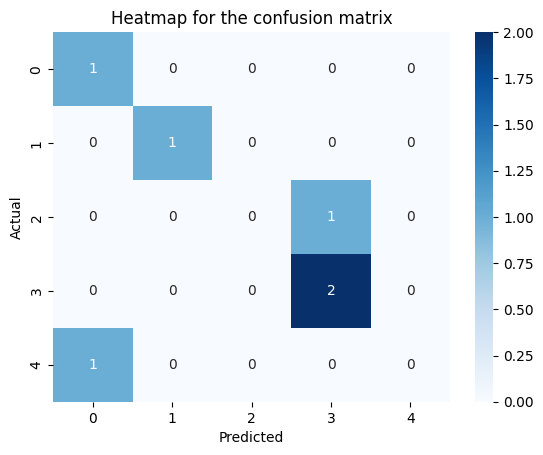

In [63]:
fig, ax = plt.subplots()
ax.set_title('Heatmap for the confusion matrix')
sns.heatmap(cm, annot = True, cmap = 'Blues')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [60]:
from sklearn.metrics import classification_report

In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.50      1.00      0.67         1
           2       1.00      1.00      1.00         1
           4       0.00      0.00      0.00         1
           5       0.67      1.00      0.80         2
           6       0.00      0.00      0.00         1

    accuracy                           0.67         6
   macro avg       0.43      0.60      0.49         6
weighted avg       0.47      0.67      0.54         6



C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(averag

In [64]:
## Warning above, is coming as we are working on a very small dataset